# Wrangle and Analyze: WeRateDogs

<a href = "#gather"> 1- Gathering Data</a>

<a href ="#assess"> 2- Assessing Data</a>

<a href ="#clean"> 3- Cleaning Data</a>

<a id = "gather"></a>
## Gathering Data

In [102]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import json
import re
from urllib.request import urlretrieve
import requests
#pd.options.display.max_colwidth = 150
pd.set_option('max_colwidth', 400)

In [103]:
# read data from "twitter-archive-enhanced.csv" file
tweeter_archieve = pd.read_csv('twitter-archive-enhanced.csv')

# display 10 rows 
tweeter_archieve.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None


In [104]:
# url to download image predicyion dataset
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# download it and store it in image_prediction tsv file.
response = requests.get(url)
with open('image_predictions.tsv', 'w') as f:
    f.write(response.text)

# read data and store it in img_prediction variable
img_prediction = pd.read_csv('image_predictions.tsv', sep = '\t')
img_prediction.head()
            

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [105]:
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt' # url of twitter json file 

res = requests.get(url) 

with open('file.txt', 'w') as f:
    f.write(res.text)

In [106]:
id_list  = [] # to store ids of images
fav_list = [] # list to store the count of likes of each photo.
ret_list = [] # list to stroe the count of retweet of each photo.

# open data file and read dictionaries from it.
with open('file.txt','r') as file:
    
    # read first dict.
    temp = file.readline()
    
    # loops untill the last dictionary in json file.
    while temp:
        mydict = json.loads(temp)  #  conver json data to python dict.
        id_list.append(mydict['id'])               # add id to id list
        fav_list.append(mydict['favorite_count'])  # add count of likes to favourite list
        ret_list.append(mydict['retweet_count'])   # add count of retweet to retweet list
        temp = file.readline()

In [107]:
# gather all data in a single dict 
data = {'id':id_list, 'favorite_count':fav_list, 'retweet_count':ret_list}

# convert data dict to data frame
tweets = pd.DataFrame(data)
tweets.head(10)

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


<a id = "assess"></a>
## Assessing Data

### Tweeter archieve dataset

In [108]:
tweeter_archieve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [109]:
# check missing values in each column
tweeter_archieve.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [110]:
# check of id's lenght
tweeter_archieve[tweeter_archieve['tweet_id'].astype(str).str.len() != 18]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [111]:
tweeter_archieve.source[55]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [112]:
# all available values in source columns (iphone - web - Vine - TweetDeck)
tweeter_archieve.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [113]:
# check tweet that has "Vine" source
tweeter_archieve[tweeter_archieve['source'] == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
529,808344865868283904,NaN,NaN,2016-12-12 16:16:49 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Seamus. He's very bad at entering pools. Still a very good boy tho 11/10 https://t.co/hfi264QwYM,NaN,NaN,NaN,https://vine.co/v/5QWd3LZqXxd,11,10,Seamus,None,None,None,None
562,802600418706604034,NaN,NaN,2016-11-26 19:50:26 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Bailey. She has mastered the head tilt. 11/10 rather h*ckin adorable https://t.co/urhl90ZE1O,NaN,NaN,NaN,https://vine.co/v/5FwUWjYaW0Y,11,10,Bailey,None,None,None,None
657,791774931465953280,NaN,NaN,2016-10-27 22:53:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Vine will be deeply missed. This was by far my favorite one. 14/10 https://t.co/roqIxCvEB3,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,14,10,None,None,None,None,None
672,789903600034189313,NaN,NaN,2016-10-22 18:57:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Ralphy. His dreams were just shattered. Poor pupper. 13/10 it'll be ok Ralphy https://t.co/P0kSN6rT6H,NaN,NaN,NaN,https://vine.co/v/5wPT1aBxPQZ,13,10,Ralphy,None,None,pupper,None
699,786286427768250368,NaN,NaN,2016-10-12 19:24:27 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Arnie. He's afraid of his own bark. 12/10 would comfort https://t.co/ObT2tSxXit,NaN,NaN,NaN,https://vine.co/v/5XH0WqHwiFp,12,10,Arnie,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,676916996760600576,NaN,NaN,2015-12-16 00:09:23 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Super speedy pupper. Does not go gentle into that goodnight. 10/10 https://t.co/uPXBXS1XNb,NaN,NaN,NaN,https://vine.co/v/imJ0BdZOJTw,10,10,None,None,None,pupper,None
1818,676593408224403456,NaN,NaN,2015-12-15 02:43:33 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This pupper loves leaves. 11/10 for committed leaf lover https://t.co/APvLqbEhkF,NaN,NaN,NaN,https://vine.co/v/eEQQaPFbgOY,11,10,None,None,None,pupper,None
1834,676121918416756736,NaN,NaN,2015-12-13 19:30:01 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Here we are witnessing a very excited dog. Clearly has no control over neck movements. 8/10 would still pet https://t.co/ICNIjSkrXs,NaN,NaN,NaN,https://vine.co/v/iZXg7VpeDAv,8,10,None,None,None,None,None
1916,674307341513269249,NaN,NaN,2015-12-08 19:19:32 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is life-changing. 12/10 https://t.co/SroTpI6psB,NaN,NaN,NaN,https://vine.co/v/i7nWzrenw5h,12,10,life,None,None,None,None


In [114]:
tweeter_archieve.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [115]:
tweeter_archieve.expanded_urls[554]

'https://twitter.com/dog_rates/status/803773340896923648/photo/1,https://twitter.com/dog_rates/status/803773340896923648/photo/1,https://twitter.com/dog_rates/status/803773340896923648/photo/1,https://twitter.com/dog_rates/status/803773340896923648/photo/1'

In [116]:
urls_col = tweeter_archieve[tweeter_archieve.expanded_urls.str.contains(',', na=False)]['expanded_urls']

for i in urls_col:
    print(i.split(','))

['https://twitter.com/dog_rates/status/891327558926688256/photo/1', 'https://twitter.com/dog_rates/status/891327558926688256/photo/1']
['https://gofundme.com/ydvmve-surgery-for-jax', 'https://twitter.com/dog_rates/status/890971913173991426/photo/1']
['https://twitter.com/dog_rates/status/890729181411237888/photo/1', 'https://twitter.com/dog_rates/status/890729181411237888/photo/1']
['https://twitter.com/dog_rates/status/890006608113172480/photo/1', 'https://twitter.com/dog_rates/status/890006608113172480/photo/1']
['https://twitter.com/dog_rates/status/889638837579907072/photo/1', 'https://twitter.com/dog_rates/status/889638837579907072/photo/1']
['https://twitter.com/dog_rates/status/888804989199671297/photo/1', 'https://twitter.com/dog_rates/status/888804989199671297/photo/1']
['https://twitter.com/dog_rates/status/888554962724278272/photo/1', 'https://twitter.com/dog_rates/status/888554962724278272/photo/1', 'https://twitter.com/dog_rates/status/888554962724278272/photo/1', 'https:/

source columns indicate where is this image comes form
1. twitter for iphone
2. Twitter Web Client
3. Vine
4. TweetDeck

In [117]:
for i in urls_col:
    print(set(i.split(',')))

{'https://twitter.com/dog_rates/status/891327558926688256/photo/1'}
{'https://twitter.com/dog_rates/status/890971913173991426/photo/1', 'https://gofundme.com/ydvmve-surgery-for-jax'}
{'https://twitter.com/dog_rates/status/890729181411237888/photo/1'}
{'https://twitter.com/dog_rates/status/890006608113172480/photo/1'}
{'https://twitter.com/dog_rates/status/889638837579907072/photo/1'}
{'https://twitter.com/dog_rates/status/888804989199671297/photo/1'}
{'https://twitter.com/dog_rates/status/888554962724278272/photo/1'}
{'https://twitter.com/dog_rates/status/887473957103951883/photo/1'}
{'https://twitter.com/dog_rates/status/888078434458587136/photo/1'}
{'https://twitter.com/dog_rates/status/887473957103951883/photo/1'}
{'https://twitter.com/dog_rates/status/886983233522544640/photo/1'}
{'https://twitter.com/dog_rates/status/886736880519319552/photo/1', 'https://www.gofundme.com/mingusneedsus'}
{'https://twitter.com/dog_rates/status/886366144734445568/photo/1'}
{'https://twitter.com/dog_r

In [118]:
# check number of missing values in last 5 columns
# None represent missing values
for col in ['name', 'doggo', 'floofer' ,'pupper', 'puppo']:
    print(col, end=':')
    print(sum(tweeter_archieve[col] == "None"))

name:745
doggo:2259
floofer:2346
pupper:2099
puppo:2326


In [119]:
for col in tweeter_archieve.columns:    
    print(col," : ",tweeter_archieve[col].duplicated().sum())

tweet_id  :  0
in_reply_to_status_id  :  2278
in_reply_to_user_id  :  2324
timestamp  :  0
source  :  2352
text  :  0
retweeted_status_id  :  2174
retweeted_status_user_id  :  2330
retweeted_status_timestamp  :  2174
expanded_urls  :  137
rating_numerator  :  2316
rating_denominator  :  2338
name  :  1399
doggo  :  2354
floofer  :  2354
pupper  :  2354
puppo  :  2354


In [120]:
sum(tweeter_archieve.rating_denominator != 10)

23

In [121]:
sum(tweeter_archieve.rating_denominator == 10)

2333

In [122]:
x = tweeter_archieve[tweeter_archieve.rating_denominator != 10]

In [123]:
x[['text', 'rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


In [124]:
for i in x.text:
    print(i, '\n')

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho 

@docmisterio account started on 11/15/15 

The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd 

Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx 

RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/… 

Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE 

After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ 

Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv 

Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a 

This is Bluebert. He just 

In [125]:
reply_to_user = tweeter_archieve[tweeter_archieve['in_reply_to_status_id'].notnull()][['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'expanded_urls']]
reply_to_user

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,expanded_urls
30,886267009285017600,8.862664e+17,2.281182e+09,NaN
55,881633300179243008,8.816070e+17,4.738443e+07,NaN
64,879674319642796034,8.795538e+17,3.105441e+09,NaN
113,870726314365509632,8.707262e+17,1.648776e+07,NaN
148,863427515083354112,8.634256e+17,7.759620e+07,NaN
...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,NaN
2149,669684865554620416,6.693544e+17,4.196984e+09,NaN
2169,669353438988365824,6.678065e+17,4.196984e+09,https://twitter.com/dog_rates/status/669353438988365824/photo/1
2189,668967877119254528,6.689207e+17,2.143566e+07,NaN


In [126]:
tweeter_archieve[tweeter_archieve['in_reply_to_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After countless hours of research and hundreds of formula alterations we have concluded that Dug should be bumped to an 11/10,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tessa. She is also very pleased after finally meeting her biological father. 10/10 https://t.co/qDS1aCqppv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438988365824/photo/1,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [127]:
cols = ['text', 'rating_numerator', 'rating_denominator']
tweeter_archieve[cols]

,text,rating_numerator,rating_denominator
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10
...,...,...,...
2351,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5,10
2352,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6,10
2353,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9,10
2354,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7,10


In [128]:
tweeter_archieve['retweeted_status_user_id'].count()

181

In [129]:
rating = tweeter_archieve.rating_numerator.astype(str) + '/' + tweeter_archieve.rating_denominator.astype(str)
rating

0       13/10
1       13/10
2       12/10
3       13/10
4       12/10
        ...  
2351     5/10
2352     6/10
2353     9/10
2354     7/10
2355     8/10
Length: 2356, dtype: object

In [130]:
rating.unique()

array(['13/10', '12/10', '14/10', '5/10', '17/10', '11/10', '10/10',
       '420/10', '666/10', '6/10', '15/10', '182/10', '960/0', '0/10',
       '75/10', '11/15', '7/10', '84/70', '9/10', '24/7', '8/10', '1/10',
       '27/10', '3/10', '9/11', '4/10', '165/150', '1776/10', '204/170',
       '4/20', '50/50', '99/90', '80/80', '45/50', '60/50', '44/40',
       '143/130', '121/110', '7/11', '20/16', '26/10', '2/10', '144/120',
       '88/80', '1/2'], dtype=object)

In [131]:
tweeter_archieve[tweeter_archieve.rating_numerator > 17][cols+ ['tweet_id', 'in_reply_to_status_id', 'retweeted_status_user_id']]


,text,rating_numerator,rating_denominator,tweet_id,in_reply_to_status_id,retweeted_status_user_id
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10,855862651834028034,8.558616e+17,NaN
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10,855860136149123072,8.558585e+17,NaN
290,@markhoppus 182/10,182,10,838150277551247360,8.381455e+17,NaN
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0,835246439529840640,8.352460e+17,NaN
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10,832215909146226688,NaN,4.196984e+09
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70,820690176645140481,NaN,NaN
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7,810984652412424192,NaN,NaN
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10,786709082849828864,NaN,NaN
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10,778027034220126208,NaN,NaN
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150,758467244762497024,NaN,NaN


In [132]:
dog_list =['doggo', 'floofer' ,'pupper', 'puppo']
tweeter_archieve[np.logical_and(tweeter_archieve['doggo'] == 'doggo',tweeter_archieve['pupper'] == 'pupper')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,"https://twitter.com/dog_rates/status/733109485275860992/photo/1,https://twitter.com/dog_rates/status/733109485275860992/photo/1",12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,"https://twitter.com/dog_rates/status/741067306818797568/photo/1,https://twitter.com/dog_rates/status/741067306818797568/photo/1",12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,doggo,Non

In [133]:
tweeter_archieve[tweeter_archieve['name'].str.len()<3]['name'].unique()

array(['a', 'Mo', 'Bo', 'an', 'O', 'Al', 'my', 'by', 'Ed', 'JD', 'Jo'],
      dtype=object)

In [134]:
tweeter_archieve[tweeter_archieve['name'].str.len()<3]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Mo. No one will push him around in the grocery cart. He's quite pupset about it. 11/10 I volunteer https://t.co/feNwTq12S5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512159186944/photo/1,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,"https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twit...",14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1",14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bo. He's going to make me cry. 13/10 please get off the bus for him Carly https://t.co/U7FvBZo6Bq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/804026241225523202/photo/1,https://twitter.com/dog_rates/status/804026241225523202/photo/1,https://twitter.com/dog_rates/status/804026241225523202/photo/1",13,10,Bo,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758794694657/photo/1,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/6

In [135]:
# display all availble names
# sort them asending 
sorted(tweeter_archieve['name'].unique(), key = len)

['a',
 'O',
 'Mo',
 'Bo',
 'an',
 'Al',
 'my',
 'by',
 'Ed',
 'JD',
 'Jo',
 'Jax',
 'Ted',
 'Jim',
 'Gus',
 'Rey',
 'Aja',
 'Jed',
 'Leo',
 'Ken',
 'Max',
 'Ava',
 'Eli',
 'Ash',
 'not',
 'Mia',
 'one',
 'Ike',
 'Tom',
 'Alf',
 'Sky',
 'Tyr',
 'Moe',
 'Sam',
 'Ito',
 'Doc',
 'mad',
 'Jay',
 'Mya',
 'Lou',
 'Eve',
 'Dex',
 'Ace',
 'Zoe',
 'Blu',
 'his',
 'all',
 'Sid',
 'old',
 'Ole',
 'Bob',
 'the',
 'Obi',
 'Evy',
 'Tug',
 'Jeb',
 'Dot',
 'Mac',
 'Taz',
 'Cal',
 'Pip',
 'Amy',
 'Gin',
 'Edd',
 'Ben',
 'Dug',
 'Ron',
 'Stu',
 'None',
 'Zoey',
 'Koda',
 'Zeke',
 'such',
 'Maya',
 'Earl',
 'Lola',
 'Yogi',
 'Noah',
 'Alfy',
 'Koko',
 'Gary',
 'Jack',
 'Emmy',
 'Beau',
 'Cash',
 'Coco',
 'Kody',
 'Dawn',
 'Cody',
 'Lili',
 'Dave',
 'Burt',
 'Carl',
 'Thor',
 'Luna',
 'Arya',
 'Iggy',
 'Kyle',
 'Odin',
 'Tuck',
 'Hank',
 'Odie',
 'Arlo',
 'Lucy',
 'Rory',
 'Tobi',
 'Kuyu',
 'Pete',
 'Kyro',
 'Loki',
 'Mutt',
 'Bear',
 'Kona',
 'Phil',
 'Toby',
 'Nala',
 'Gabe',
 'Luca',
 'Finn',
 'Anna',
 

### Image prediction data set

In [136]:
img_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [137]:
img_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [138]:
## display a summery statistics of data
img_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [139]:
## check duplicated values
img_prediction[img_prediction.duplicated(['tweet_id'])]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [140]:
## check missing value
img_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [141]:
# check if columns with string datetype hase no None values
img_prediction[img_prediction.p3.isin(['None'])]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [142]:
## check if all tweet id values have the same length
img_prediction[img_prediction.tweet_id.astype(str).str.len() !=len('666020888022790149')]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [143]:
img_prediction.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [144]:
img_prediction.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

### tweets data set

In [145]:
tweets.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [146]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [147]:
tweets.describe()

,id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [148]:
tweets.isna().sum()

id                0
favorite_count    0
retweet_count     0
dtype: int64

In [149]:
tweets.duplicated().sum()

0

__data quality issues__
<br>
`twitter archeve`

- wrong data type, tweet_id column shoud be string.
- missing value in expanded_urls columns
- missing data in rating_nomirator and rating_denomirator
- incorrect values in rating_nomirator and rating_denomirator columns
- inconsistent data typ, timestamp shoud be datetime not string.
- there are five column have alot of missing data, they wouldn't be useful
[in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp  ]
- source column contains some useless html soup which make it messy.
- None is representind missing data in [name ,doggo, floofer, pupper, puppo, ] columns
- a lot of rows in expandeded_url have multiple url separated by colon and they are identical.
- expanded url column contain url of images in tweet and url of gofundme website (two values in one column)
- data contains replyes and retweets which is not needed, original tweets are only needed.
- 181 retweet in data set must be removed
- rating values are not precise
- some rows contain multiple stages. some of these stages or wrong
- names of dogs aren't accurate (e.g. a, an, my, by ...etc)

`image prediction`
<br>
- wrong datatype, tweete_id have to be string
- inconsistant value, p1, p2 and p3 columns contain underscores betwwen words
- p_dog is false for 3 algorithm, so it better to be removed.


`tweets info`
- id has to be string.

__data tidiness issue__

- three data files are represent same information, they must be merged in single file.

`twiteer archeve`
- the last four columns have the same attribute(dog breeds), the sould be grouped in a single column
- rating_denominator should be devide by ratind_numrator column and stored in a single columns in stead of two

`image prediction`
- dog has many stages for 3 algorithm, we should keep most confident one


In [150]:
tweeter_archieve_clean = tweeter_archieve.copy()
img_prediction_clean = img_prediction.copy()
tweets_clean = tweets.copy()

<a id = "clean"></a>
## Cleaning

### Tweeter Archeive
#### Define
- convert datatype of tweet_id column from integer to string.
- convert timestamp to datetime.

#### Code

In [151]:
tweeter_archieve_clean['tweet_id'] = tweeter_archieve_clean['tweet_id'].astype(str) 
tweeter_archieve_clean['timestamp'] = pd.to_datetime(tweeter_archieve_clean['timestamp'])

In [152]:
# test 
# tweet_id have to be object.
tweeter_archieve_clean.dtypes

tweet_id                                   object
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp                 object
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
dtype: object

In [153]:
assert tweeter_archieve_clean.tweet_id.dtypes == 'object'

#### Define
- original tweets is only needed, retweets and replies must be removed

#### Code

In [154]:
# list of indeces of retweets
retweet_index = tweeter_archieve_clean[tweeter_archieve_clean['retweeted_status_id'].notnull()].index


In [155]:
# remove all retweets
tweeter_archieve_clean.drop(retweet_index, inplace = True)

In [156]:
# list of replies
reply_index = tweeter_archieve_clean[tweeter_archieve_clean['in_reply_to_user_id'].notnull()].index

In [157]:
# remove replies
tweeter_archieve_clean.drop(reply_index, inplace = True)

#### Test

In [158]:
print(tweeter_archieve_clean['in_reply_to_user_id'].notnull().sum())
print(tweeter_archieve_clean['retweeted_status_id'].notnull().sum())

0
0


#### Define
- five useless columns. they have to be droped.

#### Code

In [159]:
tweeter_archieve_clean.drop(columns = ['in_reply_to_status_id',
                                 'in_reply_to_user_id', 'retweeted_status_id',
                                 'retweeted_status_user_id', 'retweeted_status_timestamp']
                     , inplace = True)

In [160]:
# test 
tweeter_archieve_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

#### Define 
- source column have some html keywords. they have to be sliced.

#### Code

In [161]:
tweeter_archieve_clean.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [162]:
tweeter_archieve_clean['source'].replace(list(tweeter_archieve_clean.source.unique()), ['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene','TweetDeck' ], inplace = True)

#### Test

In [163]:
tweeter_archieve_clean['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

#### Define
convert None value to empty string in name, doggo, floofer, pupper and puppo.

#### Code

In [164]:
# get a list of last five columns names
col_list = tweeter_archieve_clean.columns[-5:]
col_list

Index(['name', 'doggo', 'floofer', 'pupper', 'puppo'], dtype='object')

In [165]:
# loop throughout all columns and convert None to nan value
for col in col_list:
    tweeter_archieve_clean[col] = tweeter_archieve_clean[col].replace("None",'')

In [166]:
tweeter_archieve_clean['dog_stage'] = tweeter_archieve_clean['doggo'] + tweeter_archieve_clean['floofer']+ tweeter_archieve_clean['pupper'] +tweeter_archieve_clean['puppo']
    
tweeter_archieve_clean['dog_stage'].value_counts()

                1761
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [167]:
tweeter_archieve_clean['dog_stage'].replace('', np.nan, inplace = True)

In [168]:
tweeter_archieve_clean['dog_stage'].value_counts()

pupper          221
doggo            72
puppo            23
floofer           9
doggopupper       9
doggopuppo        1
doggofloofer      1
Name: dog_stage, dtype: int64

In [169]:
# drop doggo, floofer, puppo and pupper

tweeter_archieve_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)

In [170]:
tweeter_archieve_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN
...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,,NaN
2352,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,NaN
2353,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,NaN
2354,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,NaN


#### Define
- expanded url column has duplicated urls at the same cell
- it doesn't add more information so we should remove duplicated urls
#### code

In [171]:
# remove duplicated urls and save the result
# filter row to keep only that has urls becasue nan column cause error

tweeter_archieve_clean[tweeter_archieve_clean['expanded_urls'].notnull()]['expanded_urls'] = tweeter_archieve_clean[tweeter_archieve_clean['expanded_urls'].notnull()]['expanded_urls'].str.strip().str.split(',').apply(set).str.join(',').values

C:\Users\medha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


#### Define
 dog's name is not accurate
 we should remove names that has only one char or 2
 #### code

In [172]:
tweeter_archieve_clean['name'].replace(['a', 'an', 'or', 'my', 'O', '', 'by'], np.nan, inplace = True)


In [173]:
img_prediction_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### image prediction

#### Define
- convert datatype of tweet_id to string 
- replace (_) with white space(" ") in p1, p2, p3 columns.

#### Code

In [174]:
img_prediction_clean['tweet_id'] = img_prediction_clean['tweet_id'].astype(str)
img_prediction_clean['p1'] = img_prediction_clean['p1'].str.replace("_"," ").str.title()
img_prediction_clean['p2'] = img_prediction_clean['p2'].str.replace("_"," ").str.title()
img_prediction_clean['p3'] = img_prediction_clean['p3'].str.replace("_"," ").str.title()

In [175]:
img_prediction_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1720,819347104292290561,https://pbs.twimg.com/media/C17n1nrWQAIErU3.jpg,3,Rottweiler,0.909106,True,Black-And-Tan Coonhound,0.044120,True,Doberman,0.031835,True
986,707693576495472641,https://pbs.twimg.com/media/CdI7jDnW0AA2dtO.jpg,1,Bathtub,0.499525,False,Tub,0.488014,False,Washbasin,0.009298,False
1631,805520635690676224,https://pbs.twimg.com/media/Cy3IvdZXgAUoEaj.jpg,1,Malinois,0.643147,True,German Shepherd,0.186642,True,Border Terrier,0.109345,True
1219,743895849529389061,https://pbs.twimg.com/media/ClLZU8LWQAAsOxV.jpg,1,Dalmatian,0.562315,True,Great Dane,0.416478,True,German Short-Haired Pointer,0.008552,True
1533,789986466051088384,https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg,1,Tub,0.479477,False,Bathtub,0.325106,False,Golden Retriever,0.078530,True


#### Define
p_dog is false for 3 algorithm, so it better to be removed because this definitely not dog

#### Code

In [176]:
is_dog = np.logical_or(img_prediction_clean['p1_dog'], np.logical_or(img_prediction_clean['p2_dog'], img_prediction_clean['p3_dog']))
img_prediction_clean = img_prediction_clean[is_dog]

In [177]:
# test
is_dog = np.logical_or(img_prediction_clean['p1_dog'], np.logical_or(img_prediction_clean['p2_dog'], img_prediction_clean['p3_dog']))

is_dog.all() # return true is all values are true

True

#### Define
Rename columns because their names aren't meaningful 
Remove low confedence and keep maximum one as it's more trusted

#### Code

In [178]:
# Renaming the dataset columns
cols = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']
img_prediction_clean.columns = cols

# Reshaping the dataframe
img_prediction_clean = pd.wide_to_long(img_prediction_clean, stubnames=['prediction', 'confidence', 'breed'], 
    i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()

In [179]:
img_prediction_clean

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh Springer Spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,Collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland Sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,Redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,Miniature Pinscher,0.074192,True
...,...,...,...,...,...,...,...
5248,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,2,Malamute,0.078253,True
5249,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,3,Kelpie,0.031379,True
5250,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,1,Chihuahua,0.323581,True
5251,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,2,Pekinese,0.090647,True


In [180]:
temp_df = img_prediction_clean.groupby('tweet_id')['confidence'].max()
temp_df

tweet_id
666020888022790149    0.465074
666029285002620928    0.506826
666033412701032449    0.596461
666044226329800704    0.408143
666049248165822465    0.560311
                        ...   
891087950875897856    0.425595
891327558926688256    0.555712
891689557279858688    0.170278
891815181378084864    0.716012
892177421306343426    0.323581
Name: confidence, Length: 1751, dtype: float64

In [181]:
temp_df = temp_df.to_frame()

In [182]:
temp_df = temp_df.reset_index()


In [183]:
img_prediction_clean = pd.merge(img_prediction_clean, temp_df, on=['tweet_id', 'confidence'])
img_prediction_clean

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh Springer Spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,Redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,German Shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,1,Rhodesian Ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,1,Miniature Pinscher,0.560311,True
...,...,...,...,...,...,...,...
1746,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,1,Chesapeake Bay Retriever,0.425595,True
1747,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,1,Basset,0.555712,True
1748,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,1,Paper Towel,0.170278,False
1749,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,1,Chihuahua,0.716012,True


In [184]:
is_dog = img_prediction_clean['breed'] == True

img_prediction_clean = img_prediction_clean[is_dog]

In [185]:
img_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 1750
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1532 non-null   object 
 1   jpg_url           1532 non-null   object 
 2   img_num           1532 non-null   int64  
 3   prediction_level  1532 non-null   int64  
 4   prediction        1532 non-null   object 
 5   confidence        1532 non-null   float64
 6   breed             1532 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 85.3+ KB


### Tweets info
#### Define
- id column has to be string 

#### Code

In [186]:
tweets_clean['id'] = tweets_clean['id'].astype(str)

In [187]:
# Code
tweets.dtypes

id                int64
favorite_count    int64
retweet_count     int64
dtype: object

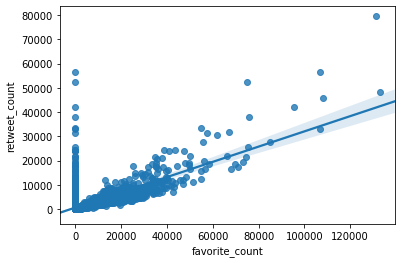

In [188]:
sb.regplot(data = tweets, x = 'favorite_count', y ='retweet_count')

### Combine files

In [189]:
tweeter_archieve_clean.shape

(2097, 9)

In [190]:
img_prediction_clean.shape

(1532, 7)

In [191]:
tweets_clean.shape

(2354, 3)

In [192]:
df_clean = pd.merge(tweeter_archieve_clean, img_prediction_clean, on='tweet_id')
df_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,1,Chihuahua,0.323581,True
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,1,Chihuahua,0.716012,True
2,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,1,Basset,0.555712,True
3,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,1,Chesapeake Bay Retriever,0.425595,True
4,890971913173991426,2017-07-28 16:27:12+00:00,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,1,Appenzeller,0.341703,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,1,Miniature Pinscher,0.560311,True
1459,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,NaN,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,1,Rhodesian Ridgeback,0.408143,True
1460,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,NaN,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,German Shepherd,0.596461,True
1461,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,NaN,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,Redbone,0.506826,True


In [193]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1462
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1463 non-null   object             
 1   timestamp           1463 non-null   datetime64[ns, UTC]
 2   source              1463 non-null   object             
 3   text                1463 non-null   object             
 4   expanded_urls       1463 non-null   object             
 5   rating_numerator    1463 non-null   int64              
 6   rating_denominator  1463 non-null   int64              
 7   name                1066 non-null   object             
 8   dog_stage           227 non-null    object             
 9   jpg_url             1463 non-null   object             
 10  img_num             1463 non-null   int64              
 11  prediction_level    1463 non-null   int64              
 12  prediction          1463 non-null 

In [194]:
df_clean = pd.merge(df_clean, tweets_clean, left_on='tweet_id', right_on='id')
df_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,prediction_level,prediction,confidence,breed,id,favorite_count,retweet_count
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,1,Chihuahua,0.323581,True,892177421306343426,33819,6514
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,1,Chihuahua,0.716012,True,891815181378084864,25461,4328
2,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,1,Basset,0.555712,True,891327558926688256,41048,9774
3,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,1,Chesapeake Bay Retriever,0.425595,True,891087950875897856,20562,3261
4,890971913173991426,2017-07-28 16:27:12+00:00,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,1,Appenzeller,0.341703,True,890971913173991426,12041,2158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,1,Miniature Pinscher,0.560311,True,666049248165822465,111,41
1459,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,NaN,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,1,Rhodesian Ridgeback,0.408143,True,666044226329800704,311,147
1460,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,NaN,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,German Shepherd,0.596461,True,666033412701032449,128,47
1461,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,NaN,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,Redbone,0.506826,True,666029285002620928,1

In [195]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1462
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1463 non-null   object             
 1   timestamp           1463 non-null   datetime64[ns, UTC]
 2   source              1463 non-null   object             
 3   text                1463 non-null   object             
 4   expanded_urls       1463 non-null   object             
 5   rating_numerator    1463 non-null   int64              
 6   rating_denominator  1463 non-null   int64              
 7   name                1066 non-null   object             
 8   dog_stage           227 non-null    object             
 9   jpg_url             1463 non-null   object             
 10  img_num             1463 non-null   int64              
 11  prediction_level    1463 non-null   int64              
 12  prediction          1463 non-null 

In [196]:
df_clean.to_csv("tweeter_archive_enhanced.csv", index=False)